# Demand Forecasting for a Retail Store

In [6]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error


# Load Data

In [7]:
# Step 2: Load Data
data = pd.read_csv(r"C:\Users\ashut\Downloads\Machine Learning\Demand Forecasting\demand.csv")

In [8]:
data.head()

,ID,Store ID,Total Price,Base Price,Units Sold
0,1,8091,99.0375,111.8625,20
1,2,8091,99.0375,99.0375,28
2,3,8091,133.9500,133.9500,19
3,4,8091,133.9500,133.9500,44
4,5,8091,141.0750,141.0750,52


# Data Preprocessing

In [9]:
# Step 3: Data Preprocessing
# Handle missing values, convert data types, etc.
data.isnull().sum() 

ID             0
Store ID       0
Total Price    1
Base Price     0
Units Sold     0
dtype: int64

In [10]:
data.dropna(inplace=True)

In [11]:
data['Total Price'].fillna(data['Total Price'].mean(), inplace=True)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150149 entries, 0 to 150149
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   ID           150149 non-null  int64  
 1   Store ID     150149 non-null  int64  
 2   Total Price  150149 non-null  float64
 3   Base Price   150149 non-null  float64
 4   Units Sold   150149 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 6.9 MB


# Exploratory Data Analysis (EDA)

In [13]:
# Step 4: Exploratory Data Analysis (EDA)
# Explore your data, visualize distributions, trends, etc.
print(data.describe())

                  ID       Store ID    Total Price     Base Price  \
count  150149.000000  150149.000000  150149.000000  150149.000000   
mean   106270.971795    9199.420935     206.626751     219.424262   
std     61385.825580     615.593192     103.308516     110.960204   
min         1.000000    8023.000000      41.325000      61.275000   
25%     53111.000000    8562.000000     130.387500     133.237500   
50%    106226.000000    9371.000000     198.075000     205.912500   
75%    159452.000000    9731.000000     233.700000     234.412500   
max    212644.000000    9984.000000     562.162500     562.162500   

          Units Sold  
count  150149.000000  
mean       51.674543  
std        60.207962  
min         1.000000  
25%        20.000000  
50%        35.000000  
75%        62.000000  
max      2876.000000  


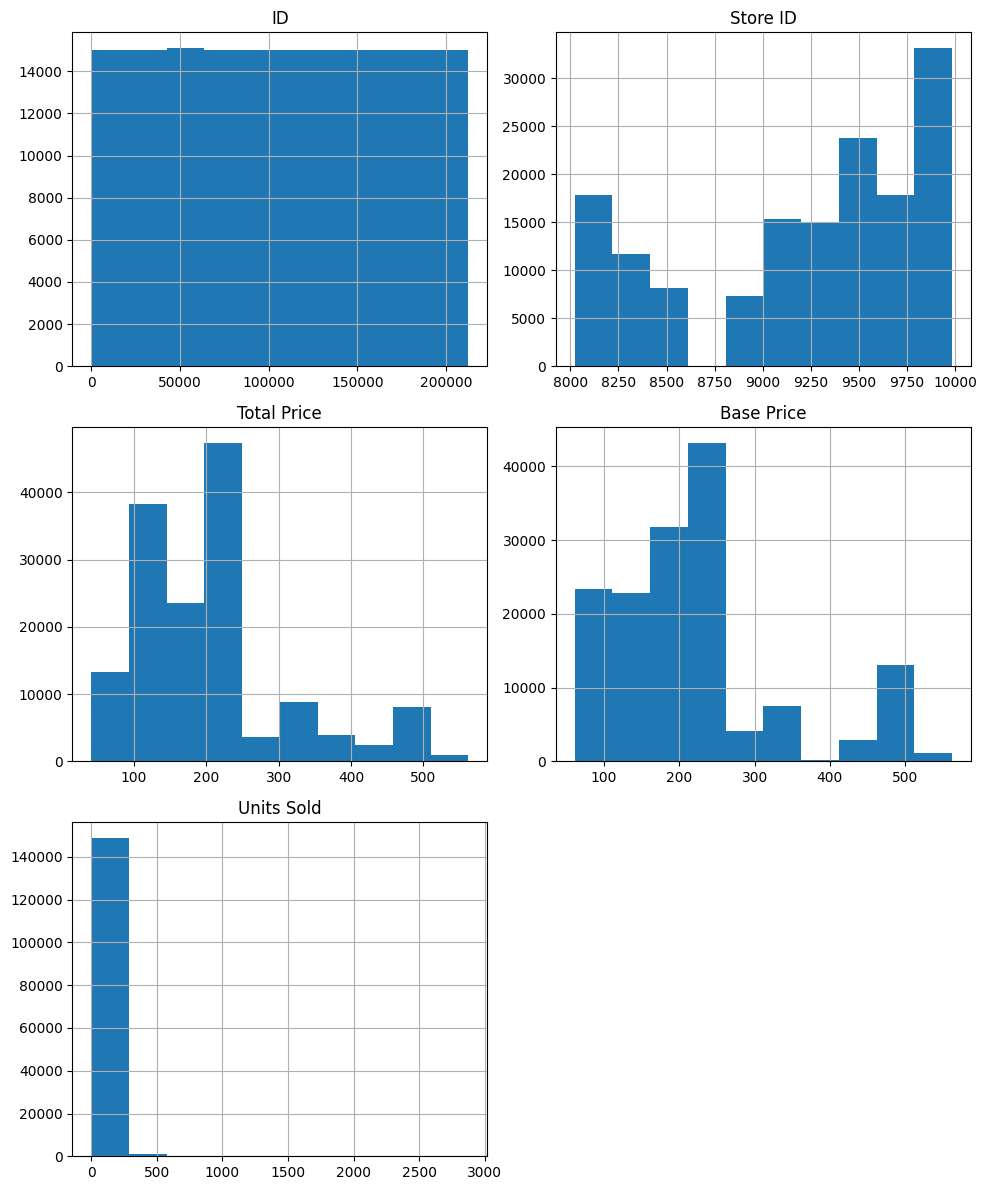

In [17]:
# Visualize Distributions
data.hist(figsize=(10, 12))
plt.tight_layout()
plt.show()

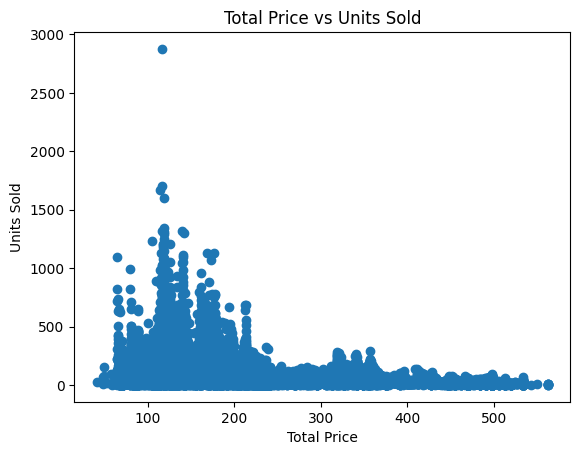

In [18]:
# Visualize Relationships
plt.scatter(data['Total Price'], data['Units Sold'])
plt.xlabel('Total Price')
plt.ylabel('Units Sold')
plt.title('Total Price vs Units Sold')
plt.show()


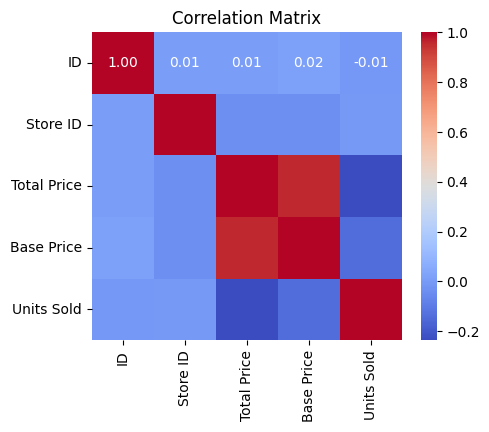

In [23]:
# Correlation Matrix
correlation_matrix = data.corr()
plt.figure(figsize=(5, 4))
sn.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Feature Selection

In [17]:
# Step 5: Feature Selection
# Create relevant features for your model
data['Units_Sold_Lag1'] = data['Units Sold'].shift(1)
data['Units_Sold_Lag7'] = data['Units Sold'].shift(7)  

In [18]:
data['Rolling_Mean'] = data['Units Sold'].rolling(window=7).mean() 
data['Rolling_Std'] = data['Units Sold'].rolling(window=7).std()  


In [19]:
data['Price_Interact'] = data['Total Price'] * data['Base Price']


In [20]:
data['Price_Ratio'] = data['Total Price'] / data['Base Price']


In [21]:
data['Price_Ratio'] = data['Total Price'] / data['Base Price']


In [22]:
data['Price_Log'] = np.log(data['Total Price'] + 1) 


In [23]:
data.dropna(inplace=True)

# Split Data

In [24]:
# Step 6: Split Data
train_data, test_data = train_test_split(data, test_size=0.2, shuffle=False)

# Model Selection

In [25]:
# Step 7: Model Selection
model = RandomForestRegressor()

# Train Model

In [26]:
# Step 8: Train Model
model.fit(train_data[['Store ID', 'Total Price', 'Base Price']], train_data['Units Sold'])

RandomForestRegressor()

In [31]:
pd.DataFrame(index=future_dates)

""
1970-01-01 00:00:00.000150149
1970-01-02 00:00:00.000150149
1970-01-03 00:00:00.000150149
1970-01-04 00:00:00.000150149
1970-01-05 00:00:00.000150149
1970-01-06 00:00:00.000150149
1970-01-07 00:00:00.000150149
1970-01-08 00:00:00.000150149
1970-01-09 00:00:00.000150149
1970-01-10 00:00:00.000150149


# Evaluate Model

In [50]:
# Step 9: Evaluate Model
predictions = model.predict(test_data[['Store ID', 'Total Price', 'Base Price']])
mae = mean_absolute_error(test_data['Units Sold'], predictions)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 25.20133655357569


# Forecasting

In [51]:
Step 10: Forecasting
# Make predictions for future time periods
future_dates = pd.date_range(start=data.index[-1], periods=30, freq='D')

In [52]:
future_data = pd.DataFrame(index=future_dates)

In [58]:
future_data['Units_Sold_Lag1'] = data['Units Sold'].iloc[-1]  
future_data['Units_Sold_Lag7'] = data['Units Sold'].iloc[-7]  

# Rolling window statistics
future_data['Rolling_Mean'] = data['Units Sold'].rolling(window=7).mean().iloc[-1]  
future_data['Rolling_Std'] = data['Units Sold'].rolling(window=7).std().iloc[-1]  

# Example: Adding time-related features
future_data['DayOfWeek'] = future_data.index.dayofweek
future_data['Month'] = future_data.index.month
future_data['Quarter'] = future_data.index.quarter

In [ ]:
future_predictions = model.predict(future_data)

In [ ]:
forecast = pd.DataFrame({'Date': future_dates, 'Predicted_Units_Sold': future_predictions})
forecast.set_index('Date', inplace=True)

NameError: name 'forecast' is not defined

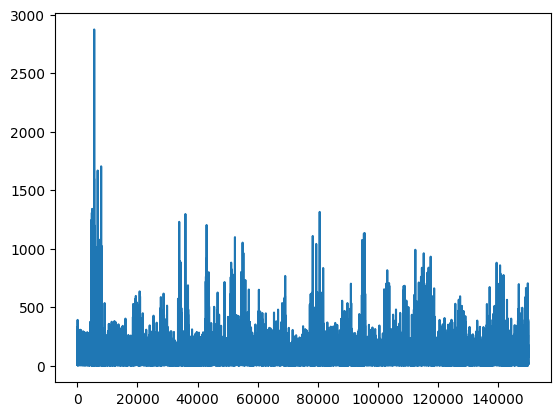

In [65]:
# Visualize the forecasted values
plt.plot(data.index, data['Units Sold'], label='Historical Data')
plt.plot(forecast.index, forecast['Predicted_Units_Sold'], label='Forecast')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.title('Forecasted Units Sold')
plt.legend()
plt.show()

#  Visualization 

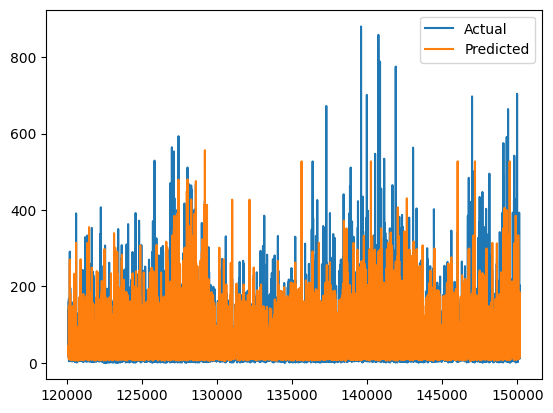

In [66]:
# Step 11: Visualization
plt.plot(test_data.index, test_data['Units Sold'], label='Actual')
plt.plot(test_data.index, predictions, label='Predicted')
plt.legend()
plt.show()

In [67]:
from sklearn.model_selection import GridSearchCV


In [69]:
# Define hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [70]:
X_train, X_val, y_train, y_val = train_test_split(train_data[['Store ID', 'Total Price', 'Base Price']], 
                                                  train_data['Units Sold'], test_size=0.2, random_state=42)

In [71]:
rf_model = RandomForestRegressor(random_state=42)

In [ ]:
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

In [ ]:
best_params = grid_search.best_params_

In [ ]:
# Train final model with best hyperparameters
final_model = RandomForestRegressor(**best_params, random_state=42)
final_model.fit(X_train, y_train)

In [ ]:
# Evaluate final model on validation set
val_predictions = final_model.predict(X_val)
val_mse = mean_squared_error(y_val, val_predictions)
print("Validation MSE:", val_mse)

In [ ]:
# Evaluate final model on test set
test_predictions = final_model.predict(X_test)
test_mse = mean_squared_error(y_test, test_predictions)
print("Test MSE:", test_mse)